<a href="https://colab.research.google.com/github/vlad-bondarenkooo/online-store-sales-analytics/blob/main/Online_store_sales_analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Підключення BigQuery**

In [ ]:
!pip install --upgrade google-cloud-bigquery

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.6/244.6 kB 4.1 MB/s eta 0:00:00
  Attempting uninstall: google-cloud-bigquery
    Found existing installation: google-cloud-bigquery 3.25.0
    Uninstalling google-cloud-bigquery-3.25.0:
      Successfully uninstalled google-cloud-bigquery-3.25.0


In [ ]:
from google.colab import auth
from google.cloud import bigquery
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
auth.authenticate_user()

In [ ]:
client = bigquery.Client(project="data-analytics-mate")

In [ ]:
query = """
SELECT s.date, s.ga_session_id, sp.continent, sp.country, sp.device, sp.browser, sp.mobile_model_name, sp.operating_system, sp.language, sp.medium, sp.name, sp.channel, acc.id, acc.is_verified, acc.is_unsubscribed, p.category, p.name, p.price, p.short_description
FROM `DA.session` s
JOIN `DA.session_params` sp
ON s.ga_session_id = sp.ga_session_id
LEFT JOIN `DA.account_session` acs
ON s.ga_session_id = acs.ga_session_id
LEFT JOIN `DA.account` acc
ON acs.account_id = acc.id
LEFT JOIN `DA.order` o
ON s.ga_session_id = o.ga_session_id
LEFT JOIN `DA.product` p
ON o.item_id = p.item_id

"""

In [ ]:
query_job = client.query(query)  # Виконання SQL-запиту
results = query_job.result()  # Очікування завершення запиту
df = results.to_dataframe()

In [ ]:
df.head()

,date,ga_session_id,continent,country,device,browser,mobile_model_name,operating_system,language,medium,name,channel,id,is_verified,is_unsubscribed,category,name_1,price,short_description
0,2021-01-19,7268004754,(not set),(not set),desktop,Chrome,Chrome,Web,en-gb,(none),(direct),Direct,<NA>,<NA>,<NA>,None,None,NaN,None
1,2021-01-06,8321293308,(not set),(not set),desktop,Chrome,Chrome,Web,None,(none),(direct),Direct,<NA>,<NA>,<NA>,None,None,NaN,None
2,2020-11-05,4392362373,(not set),(not set),desktop,Chrome,Chrome,Web,None,organic,(organic),Organic Search,<NA>,<NA>,<NA>,None,None,NaN,None
3,2020-12-09,140108698,(not set),(not set),desktop,Chrome,Safari,Web,en-us,(none),(direct),Direct,<NA>,<NA>,<NA>,None,None,NaN,None
4,2020-11-10,8351127264,(not set),(not set),mobile,Safari,iPhone,Web,en-us,organic,(organic),Organic Search,<NA>,<NA>,<NA>,None,None,NaN,None


#**Аналіз датасету**

In [ ]:
df.head()

,date,ga_session_id,continent,country,device,browser,mobile_model_name,operating_system,language,medium,name,channel,id,is_verified,is_unsubscribed,category,name_1,price,short_description
0,2021-01-19,7268004754,(not set),(not set),desktop,Chrome,Chrome,Web,en-gb,(none),(direct),Direct,<NA>,<NA>,<NA>,None,None,NaN,None
1,2021-01-06,8321293308,(not set),(not set),desktop,Chrome,Chrome,Web,None,(none),(direct),Direct,<NA>,<NA>,<NA>,None,None,NaN,None
2,2020-11-05,4392362373,(not set),(not set),desktop,Chrome,Chrome,Web,None,organic,(organic),Organic Search,<NA>,<NA>,<NA>,None,None,NaN,None
3,2020-12-09,140108698,(not set),(not set),desktop,Chrome,Safari,Web,en-us,(none),(direct),Direct,<NA>,<NA>,<NA>,None,None,NaN,None
4,2020-11-10,8351127264,(not set),(not set),mobile,Safari,iPhone,Web,en-us,organic,(organic),Organic Search,<NA>,<NA>,<NA>,None,None,NaN,None


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 349545 entries, 0 to 349544
Data columns (total 19 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   date               349545 non-null  dbdate 
 1   ga_session_id      349545 non-null  Int64  
 2   continent          349545 non-null  object 
 3   country            349545 non-null  object 
 4   device             349545 non-null  object 
 5   browser            349545 non-null  object 
 6   mobile_model_name  349545 non-null  object 
 7   operating_system   349545 non-null  object 
 8   language           235279 non-null  object 
 9   medium             349545 non-null  object 
 10  name               349545 non-null  object 
 11  channel            349545 non-null  object 
 12  id                 27945 non-null   Int64  
 13  is_verified        27945 non-null   Int64  
 14  is_unsubscribed    27945 non-null   Int64  
 15  category           33538 non-null   object 
 16  na

In [ ]:
df["ga_session_id"] = df["ga_session_id"].astype(object)
df["id"] = df["id"].astype(object)
df["is_verified"] = df["is_verified"].astype(object)
df["is_unsubscribed"] = df["is_unsubscribed"].astype(object)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 349545 entries, 0 to 349544
Data columns (total 19 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   date               349545 non-null  dbdate 
 1   ga_session_id      349545 non-null  object 
 2   continent          349545 non-null  object 
 3   country            349545 non-null  object 
 4   device             349545 non-null  object 
 5   browser            349545 non-null  object 
 6   mobile_model_name  349545 non-null  object 
 7   operating_system   349545 non-null  object 
 8   language           235279 non-null  object 
 9   medium             349545 non-null  object 
 10  name               349545 non-null  object 
 11  channel            349545 non-null  object 
 12  id                 27945 non-null   object 
 13  is_verified        27945 non-null   object 
 14  is_unsubscribed    27945 non-null   object 
 15  category           33538 non-null   object 
 16  na

In [ ]:
df.describe(include = "all")

,date,ga_session_id,continent,country,device,browser,mobile_model_name,operating_system,language,medium,name,channel,id,is_verified,is_unsubscribed,category,name_1,price,short_description
count,349545,3.495450e+05,349545,349545,349545,349545,349545,349545,235279,349545,349545,349545,27945.0,27945.0,27945.0,33538,33538,33538.000000,33538
unique,92,3.495450e+05,6,108,3,6,10,6,9,6,5,5,27945.0,2.0,2.0,14,550,NaN,1476
top,2020-12-08,7.268005e+09,Americas,United States,desktop,Chrome,Chrome,Web,en-us,organic,(organic),Organic Search,671686.0,1.0,0.0,Bookcases & shelving units,BESTÅ,NaN,Chair
freq,7212,1.000000e+00,193179,153470,204429,238460,97254,203909,159893,119024,119024,124425,1.0,20036.0,23210.0,7630,1257,NaN,659
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,953.298679,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1317.001775,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,170.000000,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,445.000000,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1195.000000,NaN


In [ ]:
start = df["date"].min()
end = df["date"].max()
print(f"Період який розглядається: {start} - {end}")

Період який розглядається: 2020-11-01 - 2021-01-31


На мою думку деякі типи колонок були неправильно визначено, тому я зробив деякі зміни. В результаті ми отримали:
- Загальна кількість колонок: 19
- Кількість колонок числового типу: 1 (**price**)  
- Кількість колонок датованого типу: 1 (**date**)
- Кількість колонок категоріального типу: 17 (**усі інші**)
- Кількість унікальних сесій: 349545
- Період який розглядається: 2020-11-01 - 2021-01-31

Щодо пропущених значень , а саме **NULL** значень, найбільше їх знаходиться в таких колонках:
- id
- is_verified
- is_unsubscribed
- category
- name
- price
- short_desription

Це пов'язано з тим , що далеко не під час кожної сесії відбувалося реєстрацая аккаунту або виконувалося якесь замовлення, тому так багато **NULL** значень.

Також хотілося б сказати за такі значення як (not_set) в таких колонках як continent та country, я вирішив , що краще їх не змінювати на NULL, так як вони все одно мають певну роль від час аналізу даних.

#**Відповіді на питання**

##***На яких континентах (топ-3) та в яких країнах (топ-5) наша компанія має найбільші продажі? Найбільшу кількість замовлень?***

In [ ]:
top_continent_sales = df.groupby("continent")["price"].sum().nlargest(3)
top_continent_sales.head()

,price
continent,
Americas,17665280.0
Asia,7601298.3
Europe,5934624.2


In [ ]:
top_continent_orders = df.groupby("continent")["price"].count().nlargest(3)
top_continent_orders.head()

,price
continent,
Americas,18553
Asia,7950
Europe,6261


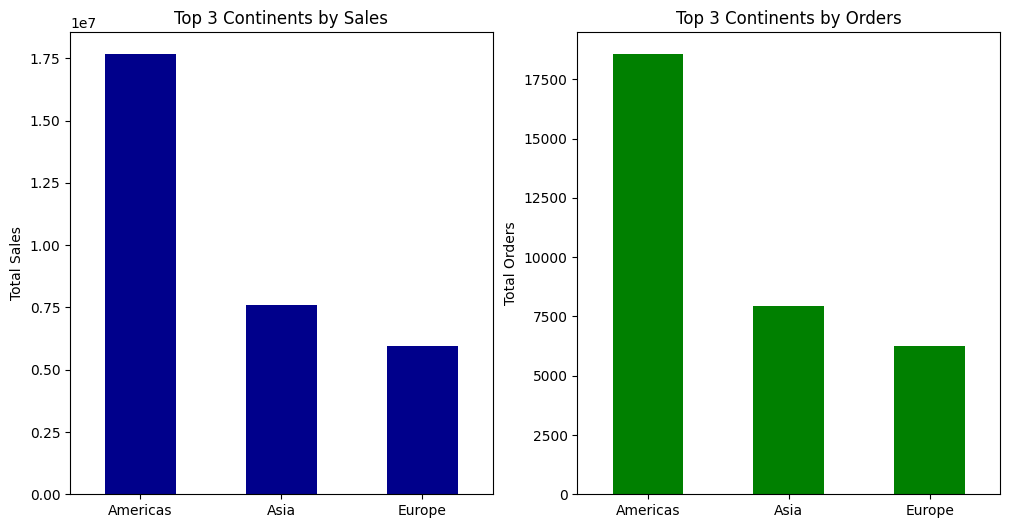

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
# Графік для продажів
top_continent_sales.plot(kind='bar', ax=axes[0], color='darkblue')
axes[0].set_title('Top 3 Continents by Sales')
axes[0].set_xlabel('')
axes[0].set_ylabel('Total Sales')
axes[0].tick_params(axis='x', rotation=0)
# Графік для замовлень
top_continent_orders.plot(kind='bar', ax=axes[1], color='green')
axes[1].set_title('Top 3 Continents by Orders')
axes[1].set_xlabel('')
axes[1].set_ylabel('Total Orders')
axes[1].tick_params(axis='x', rotation=0)

Найбільші продажі та замовлення має континент **Americas**.

In [ ]:
top_country_sales = df.groupby("country")["price"].sum().nlargest(5)
top_country_sales.head()

,price
country,
United States,13943553.9
India,2809762.0
Canada,2437921.0
United Kingdom,938317.9
France,710692.8


In [ ]:
top_country_orders = df.groupby("country")["price"].count().nlargest(5)
top_country_orders.head()

,price
country,
United States,14673
India,3029
Canada,2560
United Kingdom,1029
France,678


Найбільші продажі та замовлення має країна **United States**.

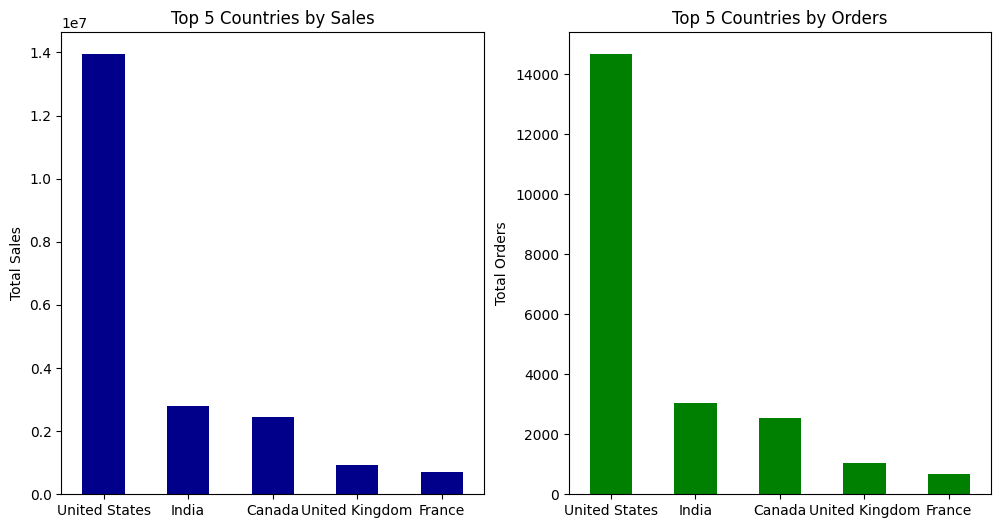

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
# Графік для продажів
top_country_sales.plot(kind='bar', ax=axes[0], color='darkblue')
axes[0].set_title('Top 5 Countries by Sales')
axes[0].set_xlabel('')
axes[0].set_ylabel('Total Sales')
axes[0].tick_params(axis='x', rotation=0)
# Графік для замовлень
top_country_orders.plot(kind='bar', ax=axes[1], color='green')
axes[1].set_title('Top 5 Countries by Orders')
axes[1].set_xlabel('')
axes[1].set_ylabel('Total Orders')
axes[1].tick_params(axis='x', rotation=0)

##***Топ-10 категорій товарів за загальною сумою продажів. Знайди топ-10 категорій товарів у країні з найбільшими продажами, чи відрізняється ситуація від загальної?***

In [ ]:
top_category_sales = df.groupby("category")["price"].sum().nlargest(10)
top_category_sales.head(10)

,price
category,
Sofas & armchairs,8388254.5
Chairs,6147748.8
Beds,4919725.0
Bookcases & shelving units,3640818.1
Cabinets & cupboards,2336499.5
Outdoor furniture,2142222.2
Tables & desks,1790307.5
Chests of drawers & drawer units,906562.5
Bar furniture,735503.0


In [ ]:
top_category_sales = df[df["country"] == "United States"].groupby("category")["price"].sum().nlargest(10)
top_category_sales.head(10)

,price
category,
Sofas & armchairs,3707144.5
Chairs,2619773.8
Beds,2213058.0
Bookcases & shelving units,1567606.9
Cabinets & cupboards,994545.5
Outdoor furniture,929245.2
Tables & desks,777865.0
Chests of drawers & drawer units,382388.0
Bar furniture,330805.0


Ситуація в країні **United States не відрізняється** від загального топ-10 категорій.

##***Проаналізуй продажі у розрізі типів та моделей девайсів (у % від загальних продажів)***

In [ ]:
total_sales = df["price"].sum()
analysis_type_device = df.groupby("device")["price"].sum()
analysis_type_device_percent = (analysis_type_device / total_sales) * 100

analysis_type_device_percent.head()

,price
device,
desktop,59.002245
mobile,38.734924
tablet,2.262831


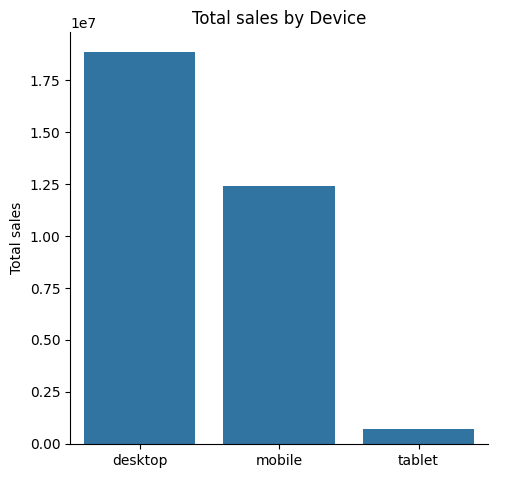

In [ ]:
sns.catplot(x="device", y="price", kind="bar", data=df, errorbar=None, estimator=sum)
plt.title("Total sales by Device")
plt.xlabel(" ")
plt.ylabel("Total sales")
plt.show()

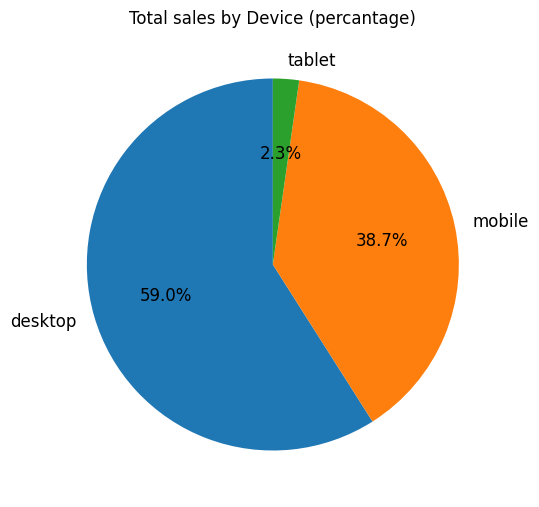

In [ ]:
plt.figure(figsize=(6, 12))
analysis_type_device_percent.plot(kind='pie', autopct='%1.1f%%', startangle=90, legend=False, textprops={'fontsize': 12})
plt.title("Total sales by Device (percantage)")
plt.ylabel("")
plt.show()

In [ ]:
analysis_model_device = df.groupby("mobile_model_name")["price"].sum().nlargest(10)
analysis_model_device_percent = (analysis_model_device / total_sales) * 100

analysis_model_device_percent.head(10)

,price
mobile_model_name,
Chrome,27.835602
<Other>,20.440966
Safari,20.302504
iPhone,20.082667
ChromeBook,5.725241
Edge,2.180746
iPad,1.403910
Firefox,1.316998
Pixel 4 XL,0.369976


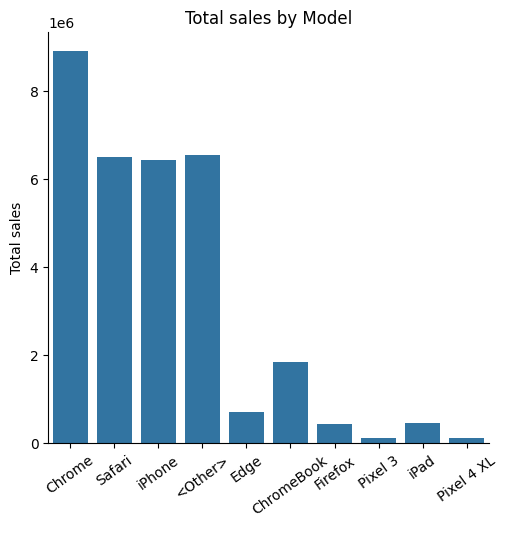

In [ ]:
sns.catplot(x="mobile_model_name", y="price", kind="bar", data=df, errorbar=None, estimator=sum)
plt.title("Total sales by Model")
plt.xlabel(" ")
plt.ylabel("Total sales")
plt.xticks(rotation = 36)
plt.show()

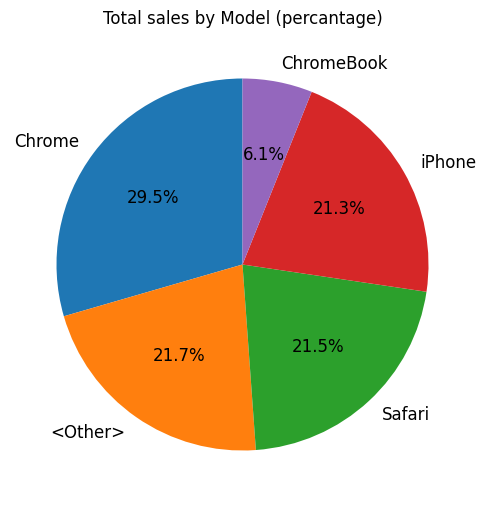

In [ ]:
plt.figure(figsize=(6, 12))
top_5_analysis_model_device_percent = analysis_model_device_percent.nlargest(5)
top_5_analysis_model_device_percent.plot(kind='pie', autopct='%1.1f%%', startangle=90, legend=False, textprops={'fontsize': 12})
plt.title("Total sales by Model (percantage)")
plt.ylabel("")
plt.show()

##***Проаналізуй продажі за джерелами трафіку (у % від загальних продажів)***

In [ ]:
analysis_channel = df.groupby("channel")["price"].sum().nlargest(5)
analysis_channel_percent = (analysis_channel / total_sales) * 100

analysis_channel_percent.head()

,price
channel,
Organic Search,35.760189
Paid Search,26.620546
Direct,23.442345
Social Search,7.919827
Undefined,6.257093


##***Який відсоток зареєстрованих користувачів підтвердив свою електронну адресу?***

In [ ]:
verified_percentage = df["is_verified"].value_counts(normalize=True) * 100
verified_percentage.head()

,proportion
is_verified,
1,71.697978
0,28.302022


##***Який відсоток зареєстрованих користувачів відписався від розсилки? Чи відрізняється поведінка (у плані продажів) тих, хто відписався від розсилки та тих, хто досі підписаний?***

In [ ]:
unsubscribed_percentage = df["is_unsubscribed"].value_counts(normalize=True) * 100
unsubscribed_percentage.head()

,proportion
is_unsubscribed,
0,83.056003
1,16.943997


In [ ]:
analysis_unsubscribed_sales = df.groupby("is_unsubscribed")["price"].sum()
analysis_unsubscribed_sales.head()

,price
is_unsubscribed,
0,2150796.9
1,431721.6


Ті хто не відписалися мають **більше** продажів, а значить розсилки спонукають до покупок наших товарів.

##***В яких країнах найбільше зареєстрованих користувачів?***

In [ ]:
analysis_account_in_country_top_5 = df.groupby("country")["id"].count().nlargest(5)
analysis_account_in_country_top_5.head()

,id
country,
United States,12384
India,2687
Canada,2067
United Kingdom,859
France,553


In [ ]:
import plotly.graph_objects as go

# Підготовка даних для кількості акаунтів по країнах
total_analysis_account_in_country = df.groupby("country")["id"].count()

# Побудова хороплет-карти
fig = go.Figure(go.Choropleth(
    locations=total_analysis_account_in_country.index,  # країни
    locationmode="country names",  # Режим по назвах країн
    z=total_analysis_account_in_country.values,  # кількість акаунтів
    colorscale="RdYlGn",  # Палітра кольорів
    colorbar_title="Account Count",  # Назва для колірної шкали
))

# Оновлення оформлення карти
fig.update_layout(title="Account Count by Country")
fig.show()


#**Аналіз динаміки продажів**

##***Знайди загальні продажі за кожну дату, створи візуалізацію загальної динаміки продажів чи спостерігається сезонність продажів?***


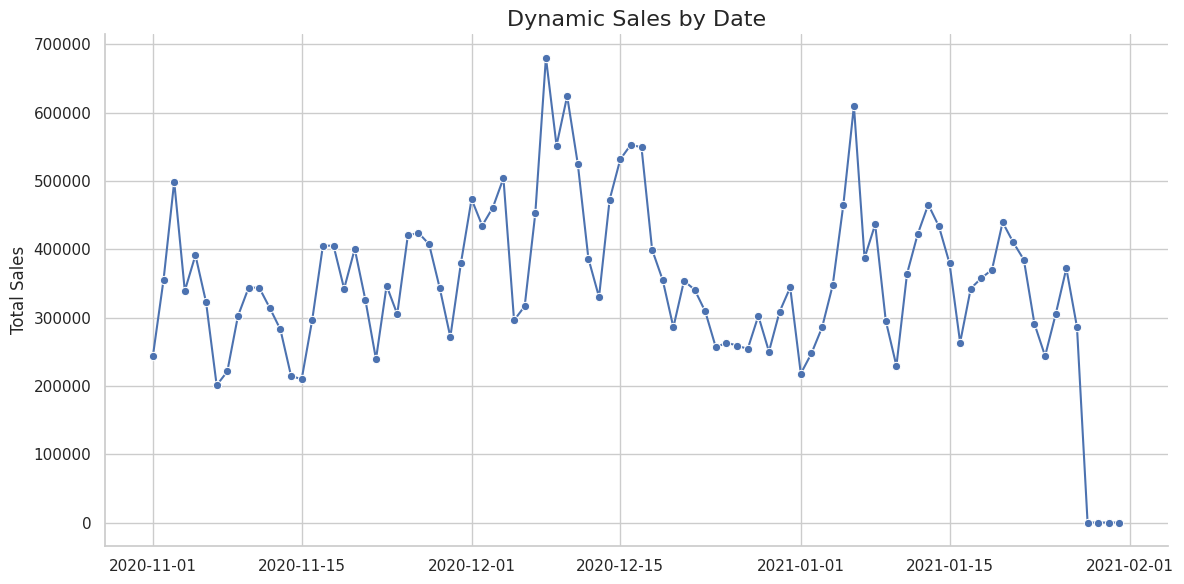

In [ ]:
# Підготовка даних
dynamyc_sales_by_date = df.groupby("date")["price"].sum().reset_index()

# Графік за допомогою Seaborn
sns.set_theme(style="whitegrid")  # Встановлення стилю Seaborn
sns.relplot(
    x="date",
    y="price",
    kind="line",
    data=dynamyc_sales_by_date,
    errorbar=None,
    aspect=2,  # Подовжений графік
    height=6,  # Висота графіка
    marker="o",  # Маркери для кожної точки
    color="b"  # Колір лінії
)

# Додаткове форматування
plt.title("Dynamic Sales by Date", fontsize=16)  # Заголовок
plt.xlabel("")  # Підпис осі X
plt.ylabel("Total Sales", fontsize=12)  # Підпис осі Y
plt.tight_layout()  # Автоматичне форматування простору
plt.show()


На мою думку ніякої сезонності продажів тут немає, так як закономірностей в графіку я не бачу, та й 3 місяця для аналізу доволі мало.

##***Проаналізуй динаміку продажів в Америці, Азії та Європі, відображай різні континенти різними кольорами***

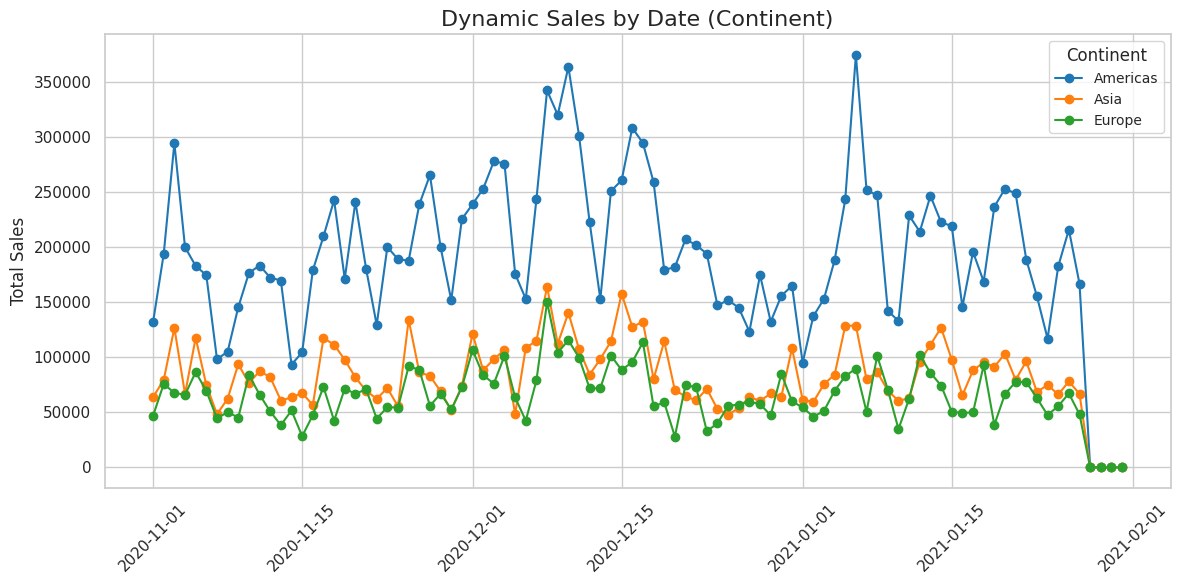

In [ ]:
# Підготовка даних
dynamyc_sales_by_date_continent = df.groupby(["date", "continent"])["price"].sum().reset_index()
continents = ["Americas", "Asia", "Europe"]
dynamyc_sales_by_date_continent_top_3 = dynamyc_sales_by_date_continent[
    dynamyc_sales_by_date_continent["continent"].isin(continents)
]

# Список кольорів для континентів
colors = {"Americas": "tab:blue", "Asia": "tab:orange", "Europe": "tab:green"}

# Створення графіка
plt.figure(figsize=(12, 6))  # Розмір графіка

# Побудова ліній для кожного континенту
for continent in continents:
    continent_data = dynamyc_sales_by_date_continent_top_3[dynamyc_sales_by_date_continent_top_3["continent"] == continent]
    plt.plot(continent_data["date"], continent_data["price"], marker="o", label=continent, color=colors[continent])

# Додавання легенди
plt.legend(title="Continent", loc="upper right", bbox_to_anchor=(1, 1), ncol=1, fontsize=10, title_fontsize=12)

# Оформлення графіка
plt.title("Dynamic Sales by Date (Continent)", fontsize=16)
plt.xlabel("")
plt.ylabel("Total Sales", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()

# Показ графіка
plt.show()


Очевидно що найбільше продажів має Америка і її динаміка доволі схожа на загальну. Продажі Азії та Європи мають майже однакові показники, але Азія все таки випереджає.

##***Проаналізуй динаміку продажів у розрізі каналів трафіку, відображай різні канали різними кольорами***

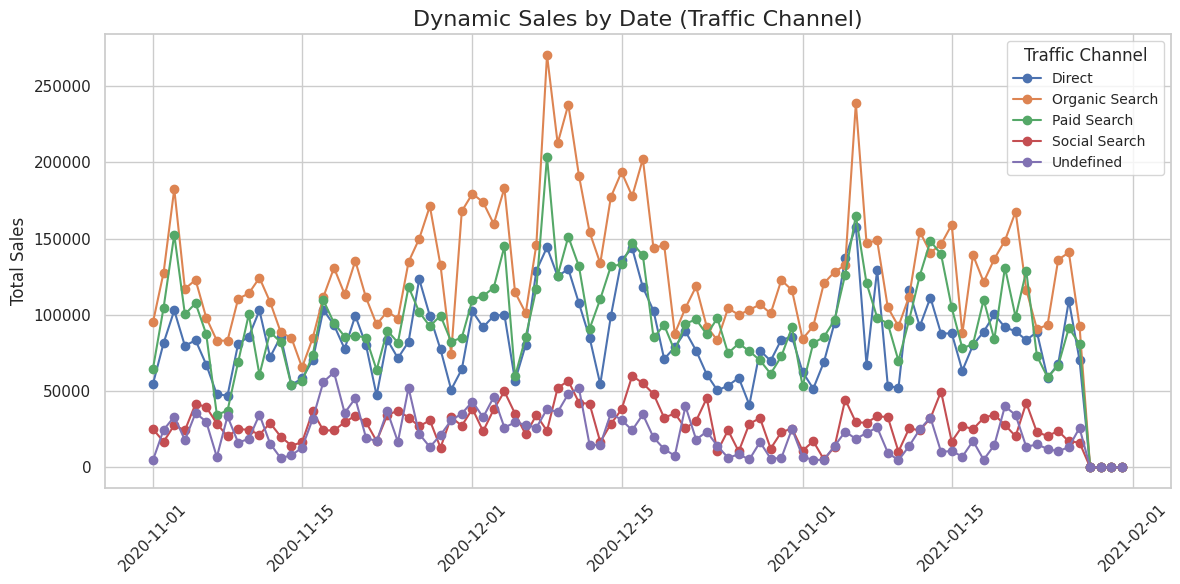

In [ ]:
# Підготовка даних
dynamyc_sales_by_date_channel = df.groupby(["date", "channel"])["price"].sum().reset_index()

# Отримання всіх джерел трафіку (каналів)
channels = dynamyc_sales_by_date_channel["channel"].unique()

# Створення графіка
plt.figure(figsize=(12, 6))  # Розмір графіка

# Побудова ліній для кожного джерела трафіку (каналу)
for channel in channels:
    channel_data = dynamyc_sales_by_date_channel[dynamyc_sales_by_date_channel["channel"] == channel]
    plt.plot(channel_data["date"], channel_data["price"], marker="o", label=channel)

# Додавання легенди
plt.legend(title="Traffic Channel", loc="upper right", bbox_to_anchor=(1, 1), ncol=1, fontsize=10, title_fontsize=12)

# Оформлення графіка
plt.title("Dynamic Sales by Date (Traffic Channel)", fontsize=16)
plt.xlabel("")
plt.ylabel("Total Sales", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()

# Показ графіка
plt.show()


Найкращим джерелом трафіку по продажам є **Organic Search**. Ніяких закономірностей я не помічаю.

##***Проаналізуй динаміку продажів у розрізі типів девайсів, відображай різні девайси різними кольорами***


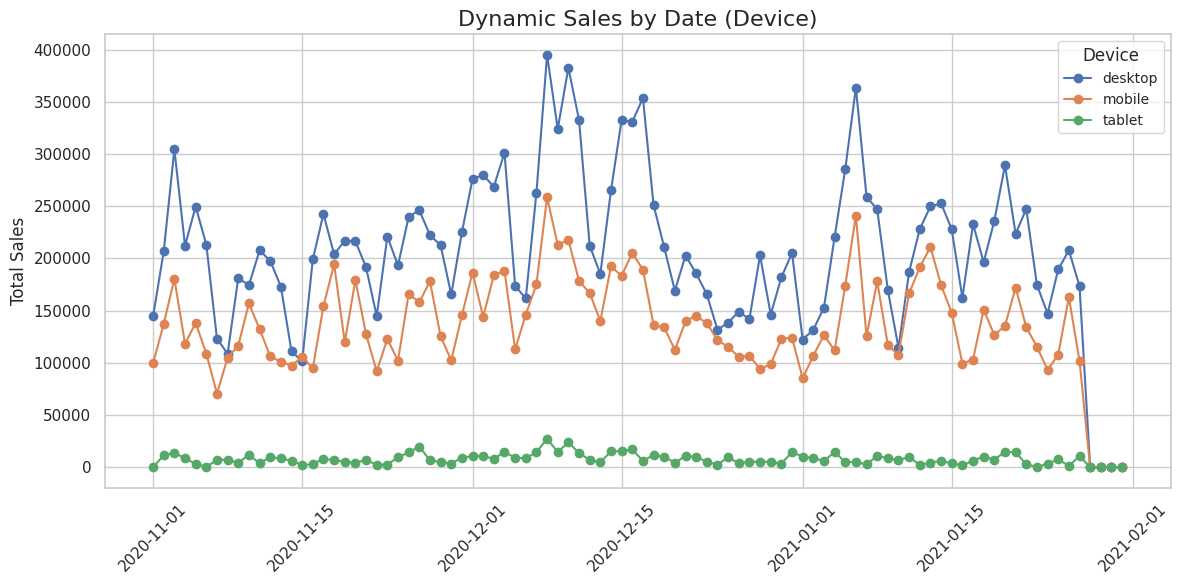

In [ ]:
# Підготовка даних
dynamyc_sales_by_date_device = df.groupby(["date", "device"])["price"].sum().reset_index()

# Отримання всіх девайсів
devices = dynamyc_sales_by_date_device["device"].unique()

# Створення графіка
plt.figure(figsize=(12, 6))  # Розмір графіка

# Побудова ліній для кожного девайсу
for device in devices:
    device_data = dynamyc_sales_by_date_device[dynamyc_sales_by_date_device["device"] == device]
    plt.plot(device_data["date"], device_data["price"], marker="o", label=device)

# Додавання легенди
plt.legend(title="Device", loc="upper right", bbox_to_anchor=(1, 1), ncol=1, fontsize=10, title_fontsize=12)

# Оформлення графіка
plt.title("Dynamic Sales by Date (Device)", fontsize=16)
plt.xlabel("")
plt.ylabel("Total Sales", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()

# Показ графіка
plt.show()


По факту продажи відбуваються лише з desktop та mobile девайсів, а tablet майже ніхто не користується.

#***Зведені таблиці***

##***Створи зведену таблицю, яка показує кількість сесій у розрізі каналів трафіку та типів девайсів (якщо значення якогось поля невідоме, його не враховуй)***

In [ ]:
# Створення pivot table
pivot_table_channel_device_count_of_sesion = pd.pivot_table(
    df,
    index="channel",
    columns="device",
    values="ga_session_id",
    aggfunc="count"
)

# Сортування по кожному стовпцю (девайсу) за спаданням
pivot_table_channel_device_count_of_sesion_sorted = pivot_table_channel_device_count_of_sesion.sort_values(by=list(pivot_table_channel_device_count_of_sesion.columns), ascending=False)

# Перегляд результату
pivot_table_channel_device_count_of_sesion_sorted.head()


device,desktop,mobile,tablet
channel,,,
Organic Search,72622,49014,2789
Paid Search,55167,37034,2140
Direct,47825,31745,1812
Social Search,16288,10988,638
Undefined,12527,8486,470


##***Створи зведену таблицю, яка показує загальні продажі за категоріями товарів (топ-10 категорій) у різних країнах (топ-5 країн)***

In [ ]:
# Створення pivot table
pivot_table_category_country_total_sales = pd.pivot_table(
    df,
    index="category",
    columns="country",
    values="price",
    aggfunc="sum"
)

# Топ-10 категорій по сумі продажів
top_10_categories = pivot_table_category_country_total_sales.sum(axis=1).nlargest(10).index

# Топ-5 країн по сумі продажів
top_5_countries = pivot_table_category_country_total_sales.sum(axis=0).nlargest(5).index

# Фільтруємо pivot table, щоб залишити тільки топ-10 категорій і топ-5 країн
pivot_table_top_10_categories_5_countries = pivot_table_category_country_total_sales.loc[top_10_categories, top_5_countries]

# Виведення результату
pivot_table_top_10_categories_5_countries.head(10)


country,United States,India,Canada,United Kingdom,France
category,,,,,
Sofas & armchairs,3707144.5,788430.0,692427.5,234812.0,187735.0
Chairs,2619773.8,544309.2,417740.8,188519.4,134029.4
Beds,2213058.0,358319.5,354772.0,133816.0,116414.0
Bookcases & shelving units,1567606.9,364507.4,278981.9,113987.6,73830.0
Cabinets & cupboards,994545.5,191888.0,181802.0,71684.5,59101.5
Outdoor furniture,929245.2,162289.4,185322.8,57002.4,40486.4
Tables & desks,777865.0,186157.5,132678.0,49374.0,42299.0
Chests of drawers & drawer units,382388.0,73111.0,71952.0,36784.0,21544.5
Bar furniture,330805.0,57657.0,51724.0,22103.0,11199.0


##***Якими браузерами частіше користуються на різних типах девайсів?***

In [ ]:
pivot_table_device_browser_count_of_session = pd.pivot_table(df, index = "device", columns = "browser", values = "ga_session_id", aggfunc = "count")
pivot_table_device_browser_count_of_session_sorted = pivot_table_device_browser_count_of_session.sort_values(by=list(pivot_table_device_browser_count_of_session.columns), ascending=False)

# Перегляд результату
pivot_table_device_browser_count_of_session_sorted.head()

browser,<Other>,Android Webview,Chrome,Edge,Firefox,Safari
device,,,,,,
mobile,6000.0,4227.0,62706.0,7.0,370.0,63957.0
desktop,2313.0,NaN,171859.0,8016.0,6063.0,16178.0
tablet,617.0,218.0,3895.0,NaN,NaN,3119.0


#**Статистичний аналіз взаємозв’язків**

##***Знайди кількість сесій та загальні продажі за кожну дату. Створи візуалізацію, щоб побачити взаємозв’язок між цими метриками. Чи корелюють ці показники? Знайди відповідний коефіцієнт кореляції та проаналізуй його статистичну значущість.***

In [ ]:
session_sales_by_date = df.groupby("date").agg(
    total_sales=("price", "sum"),
    session_count=("ga_session_id", "nunique")
).reset_index()

session_sales_by_date.head()

,date,total_sales,session_count
0,2020-11-01,244292.5,2576
1,2020-11-02,355506.8,3599
2,2020-11-03,498979.6,5173
3,2020-11-04,339187.1,4184
4,2020-11-05,391276.6,3743


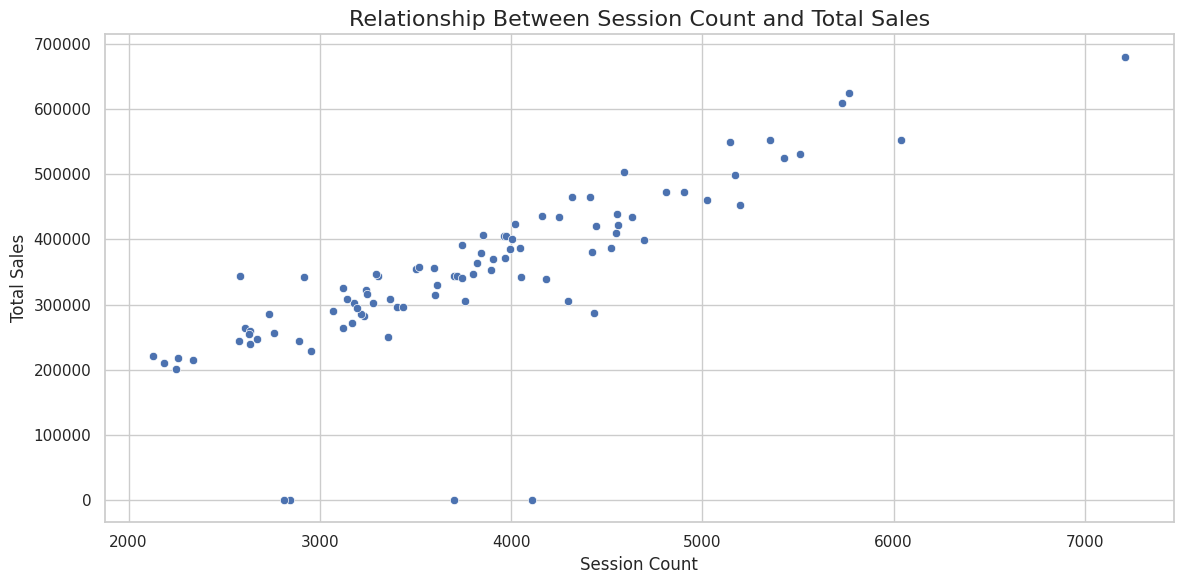

In [ ]:
# Налаштування теми
sns.set_theme(style="whitegrid")

# Створення графіка
plt.figure(figsize=(12, 6))
sns.scatterplot(data=session_sales_by_date, x="session_count", y="total_sales", marker="o", color="b")

# Оформлення графіка
plt.title("Relationship Between Session Count and Total Sales", fontsize=16)
plt.xlabel("Session Count")
plt.ylabel("Total Sales")
plt.tight_layout()

# Показ графіка
plt.show()

In [ ]:
# Обчислення коефіцієнта кореляції Пірсона
correlation = session_sales_by_date["session_count"].corr(session_sales_by_date["total_sales"])

print(f"Pearson Correlation Coefficient: {correlation}")

Pearson Correlation Coefficient: 0.7910809164540887


In [ ]:
import scipy.stats as stats

# Виконання тесту на кореляцію Пірсона
corr, p_value = stats.pearsonr(session_sales_by_date["session_count"], session_sales_by_date["total_sales"])

print(f"Pearson Correlation Coefficient: {corr}")
print(f"P-value: {p_value}")


Pearson Correlation Coefficient: 0.7910809164540888
P-value: 6.4835323120810494e-21


Коефіцієнт кореляції має доволі високий показник, майже **0.8** та він є **статистично значущим**, через мале значення p-value. Тому я можу з впевненістю сказати, що ці показники мають між собою **позитивну кореляцію**.

##***Чи корелюють між собою продажі на різних континентах? Візьми топ-3 континенти. Проаналізуй статистичну значущість взаємозв’язків.***

In [ ]:
# Фільтрація для топ-3 континентів
top_3_continents = ["Americas", "Asia", "Europe"]
df_filtered = df[df["continent"].isin(top_3_continents)]

# Групуємо по даті та континенту, підсумовуємо продажі для кожного континенту
sales_by_continent_date = df_filtered.groupby(["date", "continent"])["price"].sum().reset_index()

sales_by_continent_date.head()

,date,continent,price
0,2020-11-01,Americas,132002.5
1,2020-11-01,Asia,63823.0
2,2020-11-01,Europe,46908.0
3,2020-11-02,Americas,193861.0
4,2020-11-02,Asia,79370.0


In [ ]:
# Створюємо таблицю, де кожен континент - окремий стовпець
pivot_sales = sales_by_continent_date.pivot(index="date", columns="continent", values="price")

pivot_sales.head()

continent,Americas,Asia,Europe
date,,,
2020-11-01,132002.5,63823.0,46908.0
2020-11-02,193861.0,79370.0,75710.8
2020-11-03,294529.8,126737.8,67692.0
2020-11-04,200009.5,66602.0,65915.0
2020-11-05,182988.2,117608.4,86540.0


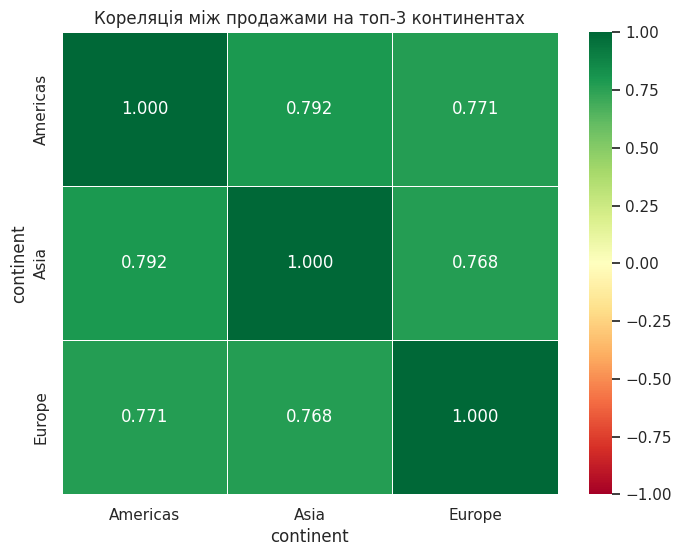

In [ ]:
# Обчислення коефіцієнтів кореляції між продажами на різних континентах
correlation_matrix = pivot_sales.corr()

plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap="RdYlGn", fmt=".3f", linewidths=0.5, vmin=-1, vmax=1)
plt.title("Кореляція між продажами на топ-3 континентах")
plt.show()

In [ ]:
# Обчислюємо p-value для кожної пари континентів
p_values = pd.DataFrame(index=pivot_sales.columns, columns=pivot_sales.columns)

for col1 in pivot_sales.columns:
    for col2 in pivot_sales.columns:
        corr, p_value = stats.pearsonr(pivot_sales[col1].dropna(), pivot_sales[col2].dropna())
        p_values.loc[col1, col2] = p_value

print("\nP-values for the correlation between continents:")
print(p_values)


P-values for the correlation between continents:
continent Americas Asia Europe
continent                     
Americas       0.0  0.0    0.0
Asia           0.0  0.0    0.0
Europe         0.0  0.0    0.0


Топ-3 континенти доволі **сильно корелюють** між собою так як їх коефіцієнт кореляції тримається на рівні **0.75** і цей результат **є статистично значущим**.(в матриці p-value всюди 0.0 так як їх значення дуже мале тому точно менше за 0.05)

##***Чи корелюють між собою продажі за різними каналами трафіку? Проаналізуй статистичну значущість взаємозв’язків.***


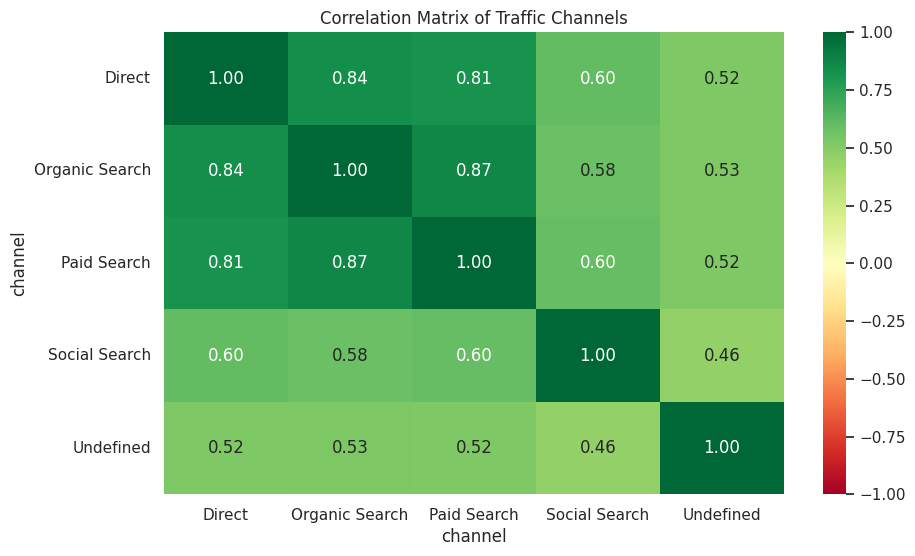


P-values for the correlation between traffic channels:
channel        Direct Organic Search Paid Search Social Search Undefined
channel                                                                 
Direct            0.0            0.0         0.0           0.0       0.0
Organic Search    0.0            0.0         0.0           0.0       0.0
Paid Search       0.0            0.0         0.0           0.0       0.0
Social Search     0.0            0.0         0.0           0.0  0.000005
Undefined         0.0            0.0         0.0      0.000005       0.0


In [ ]:
# Підготовка даних
dynamyc_sales_by_date_channel = df.groupby(["date", "channel"])["price"].sum().reset_index()

# Створення зведеної таблиці за каналами трафіку
pivot_sales_channels = dynamyc_sales_by_date_channel.pivot(index="date", columns="channel", values="price")

# Кореляційна матриця між каналами
correlation_matrix = pivot_sales_channels.corr()

# Візуалізація кореляційної матриці
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="RdYlGn", fmt=".2f", vmin=-1, vmax=1)
plt.title("Correlation Matrix of Traffic Channels")
plt.show()

# Ініціалізація DataFrame для p-value
p_values = pd.DataFrame(index=pivot_sales_channels.columns, columns=pivot_sales_channels.columns)

# Для кожної пари каналів обчислюємо Pearson correlation та p-value
for col1 in pivot_sales_channels.columns:
    for col2 in pivot_sales_channels.columns:
        # Переконуємося, що у двох стовпців однакова кількість значень
        common_index = pivot_sales_channels[[col1, col2]].dropna().index
        corr, p_value = stats.pearsonr(pivot_sales_channels.loc[common_index, col1], pivot_sales_channels.loc[common_index, col2])
        p_values.loc[col1, col2] = p_value

# Виведення таблиці p-value
print("\nP-values for the correlation between traffic channels:")
print(p_values)


Наші топ-3 канали продажів доволі сильно корелюють між собою, а інші корелюють помередньо. Ці результати **є статистично значущими**.

##***Чи корелюють між собою продажі за топ-5 категоріями товарів? Проаналізуй статистичну значущість взаємозв’язків.***

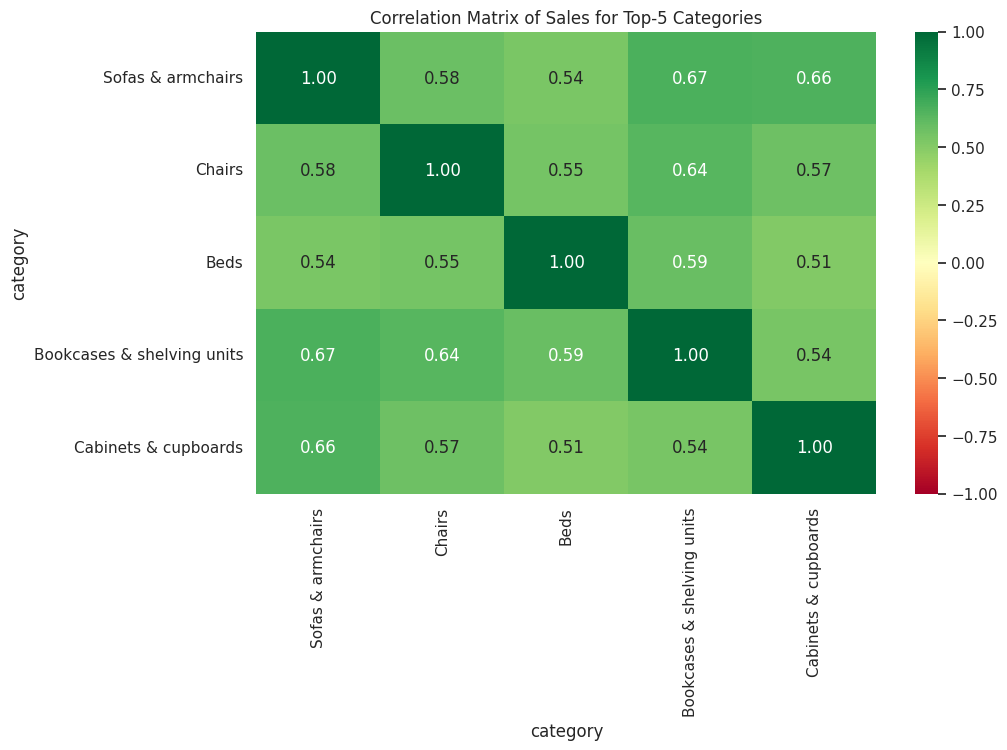


P-values for the correlation between top-5 categories:
category                   Sofas & armchairs Chairs Beds  \
category                                                   
Sofas & armchairs                        0.0    0.0  0.0   
Chairs                                   0.0    0.0  0.0   
Beds                                     0.0    0.0  0.0   
Bookcases & shelving units               0.0    0.0  0.0   
Cabinets & cupboards                     0.0    0.0  0.0   

category                   Bookcases & shelving units Cabinets & cupboards  
category                                                                    
Sofas & armchairs                                 0.0                  0.0  
Chairs                                            0.0                  0.0  
Beds                                              0.0                  0.0  
Bookcases & shelving units                        0.0                  0.0  
Cabinets & cupboards                              0.0        

In [ ]:
# Підготовка даних
dynamyc_sales_by_category = df.groupby(["date", "category"])["price"].sum().reset_index()

# Створення зведеної таблиці за категоріями товарів
pivot_sales_category = dynamyc_sales_by_category.pivot(index="date", columns="category", values="price")

# Вибір топ-5 категорій за загальними продажами
top_5_categories = pivot_sales_category.sum().nlargest(5).index
pivot_sales_category_top_5 = pivot_sales_category[top_5_categories]

# Кореляційна матриця між топ-5 категоріями
correlation_matrix = pivot_sales_category_top_5.corr()

# Візуалізація кореляційної матриці
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="RdYlGn", fmt=".2f", vmin=-1, vmax=1)
plt.title("Correlation Matrix of Sales for Top-5 Categories")
plt.show()

# Ініціалізація DataFrame для p-value
p_values = pd.DataFrame(index=pivot_sales_category_top_5.columns, columns=pivot_sales_category_top_5.columns)

# Для кожної пари категорій обчислюємо Pearson correlation та p-value
for col1 in pivot_sales_category_top_5.columns:
    for col2 in pivot_sales_category_top_5.columns:
        # Переконуємося, що у двох стовпців однакова кількість значень
        common_index = pivot_sales_category_top_5[[col1, col2]].dropna().index
        corr, p_value = stats.pearsonr(pivot_sales_category_top_5.loc[common_index, col1], pivot_sales_category_top_5.loc[common_index, col2])
        p_values.loc[col1, col2] = p_value

# Виведення таблиці p-value
print("\nP-values for the correlation between top-5 categories:")
print(p_values)


Наші категорії середньо корелюють між собою, зважаючи на їх коефіцієнти кореляції в районі 0.5. І ці результати також є статистично значущими.

#**Статистичний аналіз відмінностей між групами**

##***Проаналізуй продажі за кожну дату зареєстрованих та незареєстрованих користувачів. Створи відповідні вибірки, проаналізуй розподіли даних в обох вибірках. Підбери відповідний статистичний тест для порівняння вибірок. Зроби висновок щодо статистичної значущості отриманих результатів.***


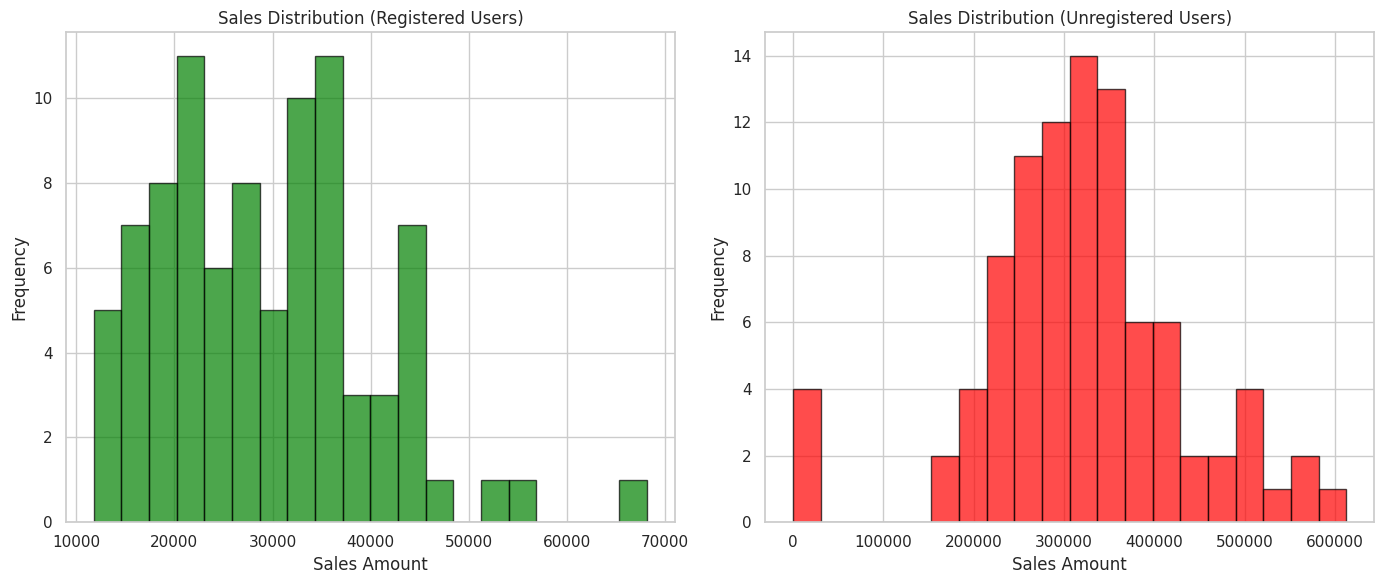

T-statistic: -24.3452
P-value: 0.000000
Результат статистично значущий: продажі зареєстрованих та незареєстрованих користувачів відрізняються.


In [ ]:
# Створення змінної реєстраційного статусу
df['registration_status'] = df['id'].notna()  # True - зареєстровані, False - незареєстровані

#  Групування за датами та статусом реєстрації
sales_by_date_status = df.groupby(['date', 'registration_status'])['price'].sum().reset_index()

#  Створення вибірок для зареєстрованих та незареєстрованих користувачів
registered_sales = sales_by_date_status[sales_by_date_status['registration_status'] == True]['price']
unregistered_sales = sales_by_date_status[sales_by_date_status['registration_status'] == False]['price']

#  Створення двох підплотів
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))  # Розміри графіків

#  Побудова гістограми для зареєстрованих користувачів
ax1.hist(registered_sales, bins=20, alpha=0.7, color='green', edgecolor='black')
ax1.set_title('Sales Distribution (Registered Users)')
ax1.set_xlabel('Sales Amount')
ax1.set_ylabel('Frequency')

#  Побудова гістограми для незареєстрованих користувачів
ax2.hist(unregistered_sales, bins=20, alpha=0.7, color='red', edgecolor='black')
ax2.set_title('Sales Distribution (Unregistered Users)')
ax2.set_xlabel('Sales Amount')
ax2.set_ylabel('Frequency')

#  Підлаштування розташування графіків
plt.tight_layout()
plt.show()

#  Виконання t-тесту для незалежних вибірок
t_stat, p_value = stats.ttest_ind(registered_sales, unregistered_sales, equal_var=False)  # Welch's t-test

#  Виведення результатів
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.6f}")

#  Висновок
if p_value < 0.05:
    print("Результат статистично значущий: продажі зареєстрованих та незареєстрованих користувачів відрізняються.")
else:
    print("Результат не є статистично значущим: не виявлено значної різниці між продажами зареєстрованих та незареєстрованих користувачів.")


Так як вибірки мають **нормальний розподіл**, особливо це видно на гістограмі незареєстрованих користувачів, то я обрав саме **t-тест** для порівняння.

##***Проаналізуй кількість сесій за різними каналами трафіку. Підбери відповідний тест. Чи є статистично значущі відмінності між групами?***

ANOVA test result: F-statistic = 1.4033020827476252, p-value = 0.22995860281947955
Немає статистично значущих відмінностей між каналами.


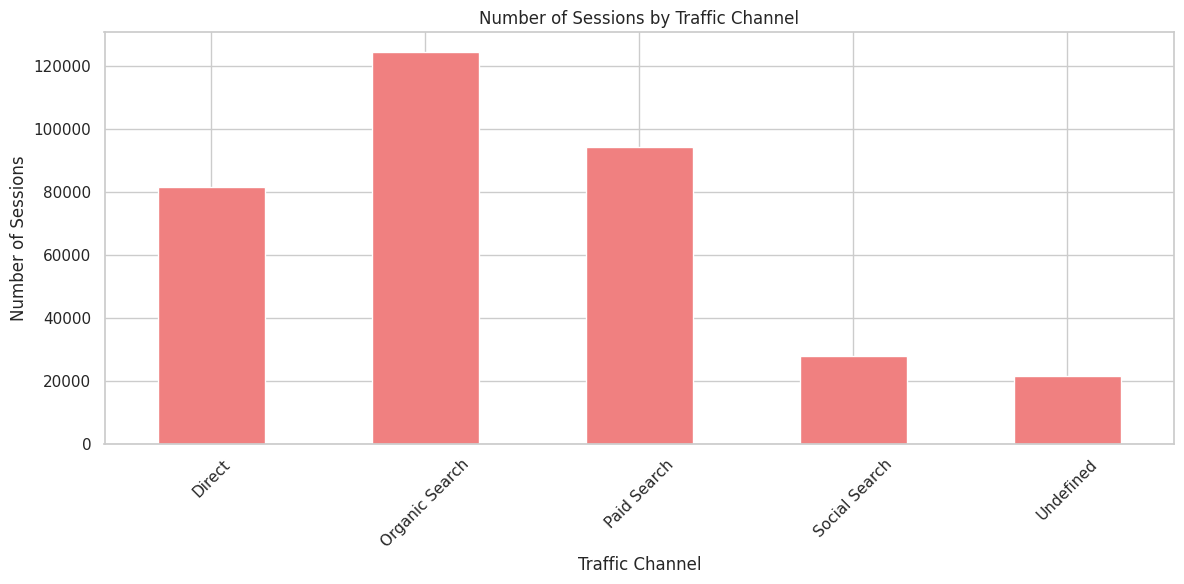

In [ ]:
# Агрегуємо кількість сесій за каналами трафіку
sessions_by_channel = df.groupby("channel")["ga_session_id"].nunique()

# Перевірка, чи каналів більше двох
if len(sessions_by_channel) > 2:
    # Створюємо список даних для кожного каналу
    groups = [df[df['channel'] == channel]['ga_session_id'] for channel in sessions_by_channel.index]

    # Виконання одностороннього аналізу дисперсії (ANOVA)
    f_stat, p_value = stats.f_oneway(*groups)

    print(f"ANOVA test result: F-statistic = {f_stat}, p-value = {p_value}")

    # Аналіз результатів
    if p_value < 0.05:
        print("Є статистично значущі відмінності між каналами.")

        # Якщо ANOVA показав значущі відмінності, виконуємо пост-хок тест Тьюкі
        from statsmodels.stats.multicomp import pairwise_tukeyhsd
        tukey_result = pairwise_tukeyhsd(df['ga_session_id'], df['channel'], alpha=0.05)
        print("\nPost-hoc Tukey test results:")
        print(tukey_result.summary())

    else:
        print("Немає статистично значущих відмінностей між каналами.")
else:
    print("ANOVA тест застосовується тільки для порівняння більше ніж двох груп.")

# Візуалізація кількості сесій за різними каналами
plt.figure(figsize=(12, 6))
sessions_by_channel.plot(kind='bar', color='lightcoral')
plt.title('Number of Sessions by Traffic Channel')
plt.xlabel('Traffic Channel')
plt.ylabel('Number of Sessions')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


##***Чи відрізняється статистично доля сесій з органічним трафіком у Європі та Америці? Підбери відповідний тест. Проведи потрібні обчислення для створення вхідних даних до тесту.***

In [ ]:
# Фільтрація даних для Європи та Америки
df_europe = df[(df['continent'] == 'Europe') & (df['channel'] == 'Organic Search')]
df_americas = df[(df['continent'] == 'Americas') & (df['channel'] == 'Organic Search')]

# Підрахунок загальної кількості сесій та кількості сесій з органічним трафіком
europe_sessions = len(df_europe)
europe_total = len(df[df['continent'] == 'Europe'])
americas_sessions = len(df_americas)
americas_total = len(df[df['continent'] == 'Americas'])

# Обчислення пропорцій сесій з органічним трафіком для кожного континенту
p_europe = europe_sessions / europe_total
p_americas = americas_sessions / americas_total

# Обчислення стандартної похибки різниці пропорцій
pooled_p = (europe_sessions + americas_sessions) / (europe_total + americas_total)
se = np.sqrt(pooled_p * (1 - pooled_p) * (1 / europe_total + 1 / americas_total))

# Обчислення z-статистики
z_stat = (p_europe - p_americas) / se

# Обчислення p-value
p_value = stats.norm.cdf(z_stat)

# Виведення результатів
print(f"Proportion of organic traffic in Europe: {p_europe}")
print(f"Proportion of organic traffic in Americas: {p_americas}")
print(f"Z-statistic: {z_stat}")
print(f"P-value: {p_value}")

# Оцінка статистичної значущості
if p_value < 0.05:
    print("Є статистично значущі відмінності в долі сесій з органічним трафіком між Європою та Америкою.")
else:
    print("Немає статистично значущих відмінностей в долі сесій з органічним трафіком між Європою та Америкою.")


Proportion of organic traffic in Europe: 0.3561065479388961
Proportion of organic traffic in Americas: 0.3554785975701293
Z-statistic: 0.28951412926103953
P-value: 0.6139060154749124
Немає статистично значущих відмінностей в долі сесій з органічним трафіком між Європою та Америкою.


##***Порівняння продажей у будні та вихідні дні за допомогою теста Манна-Вітні.***

In [ ]:
df['date'] = pd.to_datetime(df['date'])
# Вибірки для буднів і вихідних
weekday_sales = df[df['date'].dt.weekday < 5]['price'].dropna()
weekend_sales = df[df['date'].dt.weekday >= 5]['price'].dropna()

# Виконання тесту Манна-Вітні
stat, p_value = stats.mannwhitneyu(weekday_sales, weekend_sales)

# Виведення результатів
print(f"U-statistic: {stat:.4f}")
print(f"P-value: {p_value:.6f}")

if p_value < 0.05:
    print("Продажі у вихідні та будні статистично відрізняються.")
else:
    print("Немає статистично значущої різниці між продажами у вихідні та будні.")


U-statistic: 100066776.0000
P-value: 0.040462
Продажі у вихідні та будні статистично відрізняються.


##***Порівняємо продажі між кількома каналами трафіку за допомогою теста Крускала-Уолліса***

In [ ]:
# Отримуємо унікальні канали
channels = df["channel"].unique()

# Створюємо список вибірок для кожного каналу
sales_groups = [df[df["channel"] == channel]["price"].dropna() for channel in channels]

# Виконуємо тест Крускала-Уолліса
stat, p_value = stats.kruskal(*sales_groups)

# Виводимо результати
print(f"H-statistic: {stat}")
print(f"P-value: {p_value:.5f}")

# Висновок
if p_value < 0.05:
    print("Є статистично значуща різниця між каналами трафіку.")
else:
    print("Статистично значущої різниці немає.")


H-statistic: 2.776623534794019
P-value: 0.59587
Статистично значущої різниці немає.


#**Посилання на DashBoard:** https://public.tableau.com/app/profile/vlad.bondarenko/viz/Portfolio2_17382584774640/Dashboard1?publish=yes